# Project 3 Collaborative Filtering

## Question 1:
Compute the sparsity of the movie rating dataset, where sparsity is defined by the following equation:
$$Sparsity = \frac{Total number of available ratings}{Total number of possible ratings}$$

In [1]:
# import data
import numpy as np
import csv
def loadCSVfile(name):
    try:
        tmp = np.loadtxt(name, dtype = np.str, delimiter = ",")
        data = tmp[1:,0:].astype(np.str) #加载数据部分
        label = tmp[0,0:].astype(np.str) #加载类别标签部分
    except ValueError:
        with open(name,"r",encoding = "UTF-8") as f:
            content = csv.reader(f)
            li = []
            i = 0
            for row in content:
                if i == 0:
                    label = np.array(row)
                else:
                    li.append(np.array(row))
                i += 1
            data = np.array(li)
    return data, label #返回array类型的数据

ratings, rate_label = loadCSVfile('ratings.csv')
tags, tag_label = loadCSVfile('tags.csv')
links, link_label = loadCSVfile('links.csv')
movies, movie_label = loadCSVfile('movies.csv')

In [2]:
print('-'*20,'ratings','-'*20)
print("The labels are:",rate_label)
print("How much is the data:",ratings.shape)
print('-'*20,'tags','-'*20)
print("The labels are:",tag_label)
print("How much is the data:",tags.shape)
print('-'*20,'links','-'*20)
print("The labels are:",link_label)
print("How much is the data:",links.shape)
print('-'*20,'movies','-'*20)
print("The labels are:",movie_label)
print("How much is the data:",movies.shape)

-------------------- ratings --------------------
The labels are: ['userId' 'movieId' 'rating' 'timestamp']
How much is the data: (100836, 4)
-------------------- tags --------------------
The labels are: ['userId' 'movieId' 'tag' 'timestamp']
How much is the data: (3683, 4)
-------------------- links --------------------
The labels are: ['movieId' 'imdbId' 'tmdbId']
How much is the data: (9742, 3)
-------------------- movies --------------------
The labels are: ['movieId' 'title' 'genres']
How much is the data: (9742, 3)


In [3]:
def sparsity(data):
    rate = 0
    total = len(data)
    for i in data:
        if i.startswith("0"):
            pass
        else:
            rate+=1
    return float(rate)/float(total)

sparsity(ratings[:,2])

0.9864135824507121

## Question 2:
Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram.

In [4]:
from collections import Counter
rating_span = np.arange(0.5,5.5,0.5)
rating_counter = Counter(ratings[:,2])
rating_counter2 = [rating_counter[str(i)] for i in rating_span]
rating_count = np.array([rating_span,rating_counter])
rating_counter

Counter({'0.5': 1370,
         '1.0': 2811,
         '1.5': 1791,
         '2.0': 7551,
         '2.5': 5550,
         '3.0': 20047,
         '3.5': 13136,
         '4.0': 26818,
         '4.5': 8551,
         '5.0': 13211})

Text(0.5,1,'Frequency of rating values')

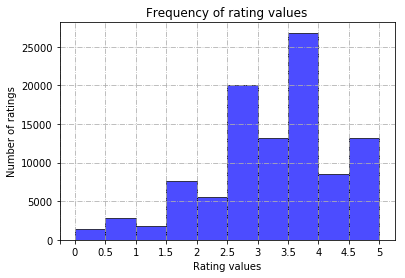

In [5]:
# plot the histogram
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(rating_span, rating_counter2, 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks((0,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25),(u'',u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating values')
plt.ylabel('Number of ratings')
plt.title('Frequency of rating values')

## Question 3:
Plot the distribution of the number of ratings received among movies. To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y-axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has index 1; ties can broken in any way. A monotonically decreasing curve instead of a histogram is expected.

In [6]:
movie_rate = Counter(ratings[:,1])
movie_rate_dec = sorted(movie_rate.items(),key = lambda item: item[1],
                 reverse = True)
movie_y = [i[1] for i in movie_rate_dec]
movie_x = [i[0] for i in movie_rate_dec]

Text(0.5,1,'Distribution of the number of ratings received among movies')

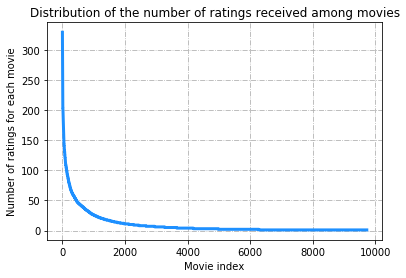

In [7]:
length = len(movie_y)
plt.plot(range(1,length+1),movie_y,color='dodgerblue',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('Movie index')
plt.ylabel('Number of ratings for each movie')
plt.title('Distribution of the number of ratings received among movies')

## Question 4:
Plot the distribution of ratings among users. To be specific, the X-axis should be the user index ordered by decreasing frequency and the Y-axis should be the number of movies the user have rated. The requirement of the plot is similar to that in Question 3.

In [8]:
user_rate = Counter(ratings[:,0])
user_rate_dec = sorted(user_rate.items(),key = lambda item: item[1],
                      reverse = True)
user_y = [i[1] for i in user_rate_dec]
user_x = [i[0] for i in user_rate_dec]

Text(0.5,1,'Distribution of ratings among users')

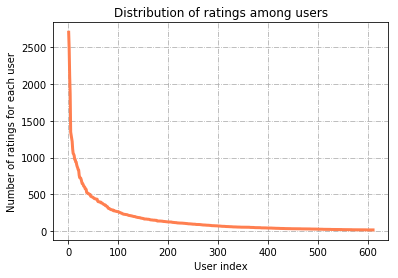

In [9]:
length = len(user_y)
plt.plot(range(1,length+1),user_y,color='coral',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('User index')
plt.ylabel('Number of ratings for each user')
plt.title('Distribution of ratings among users')

## Question 5:
Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.

#### There are so many movies but the number of ratings are nothing comparing to that of movies. And there are so many movies that only one or two ratings are received. 

## Question 6:
Compute the variance of the rating values received by each movie. Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram. 

In [10]:
# Calculate the variance of ratings for each movie
def get_var(data):
    length = data.shape[0]
    d = {}
    d_key = set(data[:,0])
    for i in d_key:
        li = []
        for j in range(length):
            if i == data[j,0]:
                li.append(float(data[j,1]))
        d_var = np.var(li)
        d[i] = d_var
    return d

rating_var_dict = get_var(ratings[:,1:3])

In [51]:
# Compute the number of movies in each variance interval
import math
def get_interval(var_dict):
    max_value = max(var_dict.values())
    interval = np.arange(0,float(float(math.ceil(max_value*2))/2+0.5),0.5)
    length = len(interval)
    counter = {}
    for i in interval[:-1]:
        counter[i] = 0
    for item in var_dict.items():
        for i in range(length-1):
            if item[1]>=interval[i] and item[1]<interval[i+1]:
                counter[interval[i]]+=1
    return counter, interval

rating_var_count,interval = get_interval(rating_var_dict)
print('The number of ratings to each interval of variance:')
rating_var_count

The number of ratings to each interval of variance:


{0.0: 5996,
 0.5: 2313,
 1.0: 990,
 1.5: 265,
 2.0: 100,
 2.5: 22,
 3.0: 27,
 3.5: 4,
 4.0: 4,
 4.5: 1,
 5.0: 2}

Text(0.5,1,'Variance of the rating values rerceived by each movie')

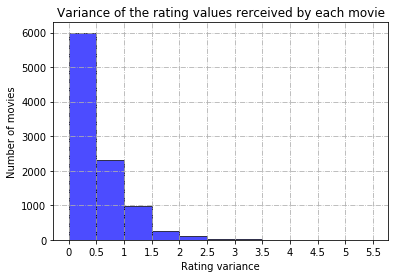

In [62]:
# show time
plt.bar(rating_var_count.keys(), rating_var_count.values(), 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks(interval-0.25,(u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5',u'5.5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating variance')
plt.ylabel('Number of movies')
plt.title('Variance of the rating values rerceived by each movie')

## Question 7:
Write down the formula for $\mu_u$ in terms of $I_u$ and $r_{uk}$